In [1]:
import gymnasium as gym
from gymnasium import spaces
import mujoco
import numpy as np 
import time 
import os 
import mediapy as media
import matplotlib.pyplot as plt 
class CustomEnv(gym.Env):
    def __init__(self):
        self.model = mujoco.MjModel.from_xml_path('cassie.xml')
        self.data = mujoco.MjData(self.model)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.model.nu,))
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.model.nq + self.model.nv,))
        self.renderer = mujoco.Renderer(self.model)



    def reset(self):
        self.time_step = 0 
        mujoco.mj_resetData(self.model, self.data)
        obs = np.concatenate([self.data.qpos, self.data.qvel]).ravel()
        return obs
    
    def step(self, action):
        self.data.ctrl[:] = action
        mujoco.mj_forward(self.model, self.data)
        self.renderer.update_scene(self.data)
        obs = np.concatenate([self.data.qpos, self.data.qvel]).ravel()
        reward = self._get_reward()
        self.time_step +=1 
        done = False
        info = {}
        return obs, reward, done, info
    
    def render(self, mode='human'):
        if mode == 'human':
            # render the current state of the environment using mujoco-py's built-in viewer
            img= self.renderer.render()
            media.show_image(img)
        elif mode == 'file':
                        # append the current time and timestep to the filename
            timestamp = time.strftime('%Y%m%d-%H%M%S')
            file_name = 'cassie_%s_%d_%s.png' % (timestamp, self.time_step, "cassie")
            # save the current state of the environment as an image file
            img = self.renderer.render()

            img.save(os.path.join('images', file_name))


    def _get_reward(self):
        # define the reward function here
        return 0.0




In [2]:
cassie = CustomEnv()
cassie.reset()

array([ 0.        ,  0.        ,  1.01      ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        , -0.78539816,
        0.        ,  1.01229097,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        , -0.78539816,  0.        ,
        1.01229097,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

""

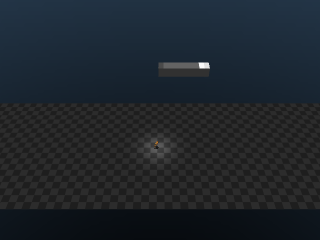

In [8]:
cassie.render('human')

In [7]:
cassie.step(3)

(array([ 0.        ,  0.        ,  1.01      ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        , -0.78539816,
         0.        ,  1.01229097,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        , -0.78539816,  0.        ,
         1.01229097,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]),
 0.0,
 False,
 

""

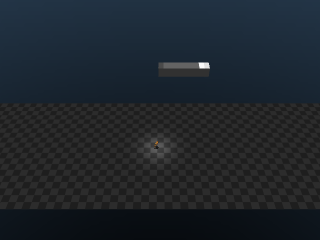

In [10]:
cassie.render()
